In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

In [2]:
iris = pd.read_csv('../dataset/iris_data.csv')

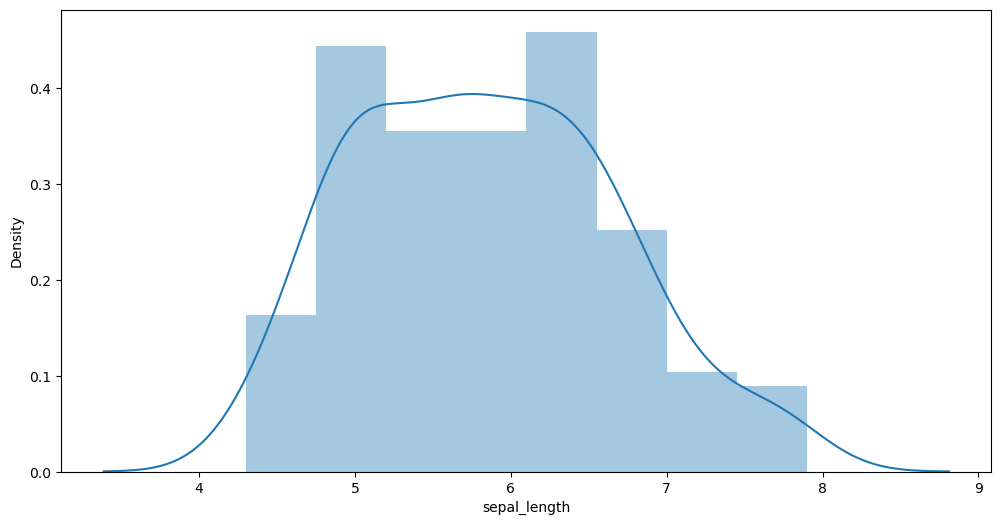

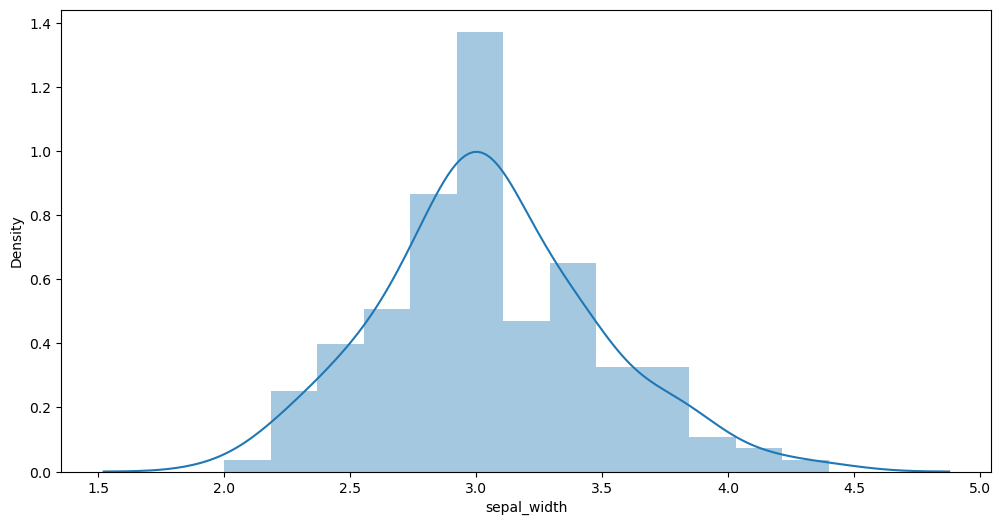

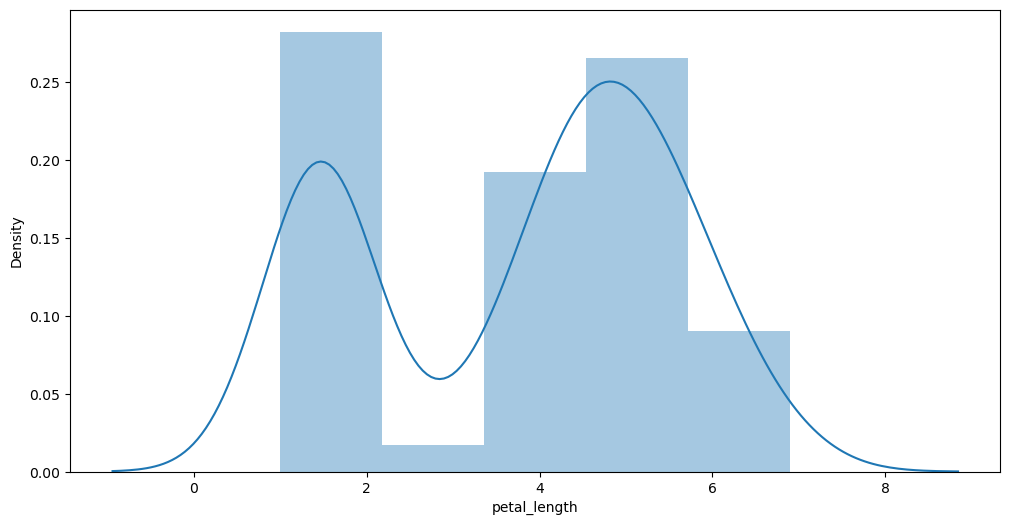

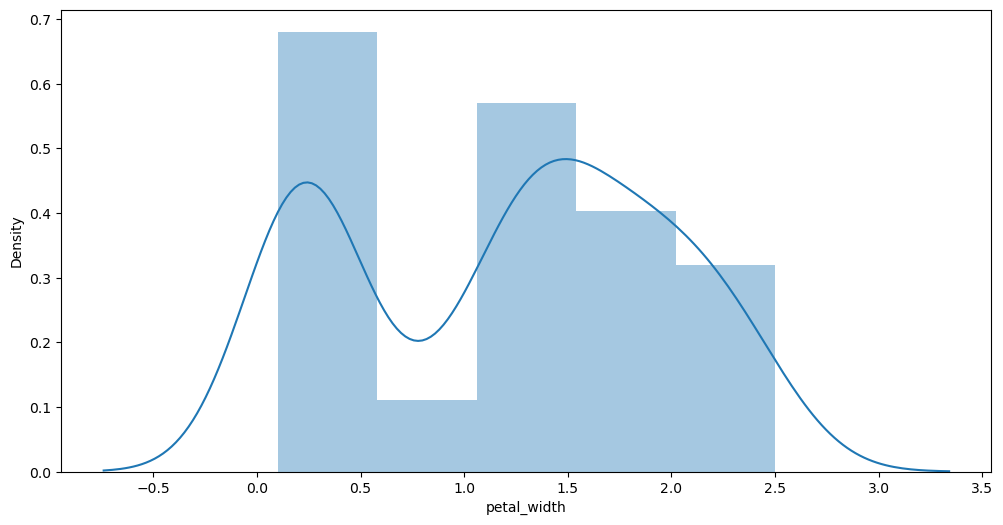

In [3]:
for col in iris.columns[0:4]:
    plt.figure(figsize = (12,6))
    sns.distplot(iris[col])
    plt.show()

# Model Building

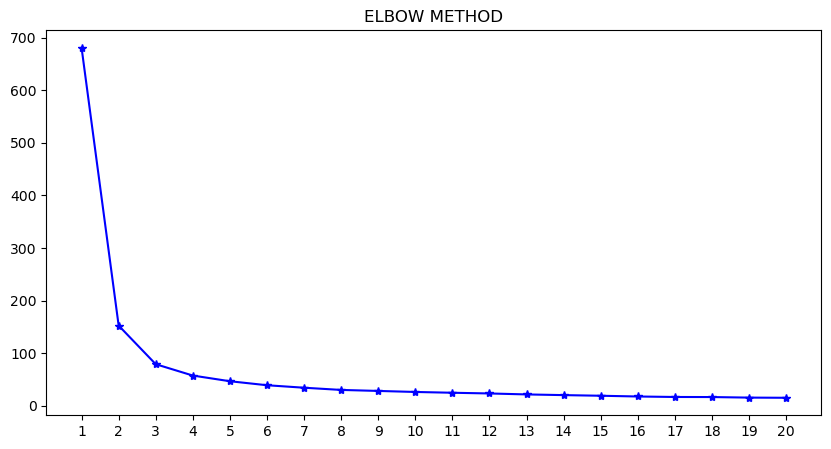

In [4]:
X1 = iris.drop('species', axis = 1)
y1 = iris['species']

inertia_List = []

for i in (range(1, 21)):
    kmean_model = KMeans(n_clusters = i).fit(X1)
    inertia_List.append(kmean_model.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1,21,1), inertia_List,color = 'blue', marker = '*')
plt.title('ELBOW METHOD')
plt.xticks(range(1, 21))  # Setting x-axis ticks
plt.show()

In [5]:
final_kmeans_model = KMeans(n_clusters = 3).fit(X1)

In [6]:
inertia = final_kmeans_model.inertia_
print(f"Inertia : {inertia}")

Inertia : 78.94084142614601


In [7]:
labels = final_kmeans_model.labels_
silhouette_avg = silhouette_score(X1, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5525919445499757


# hyperparameter tuning for K-Means clustering

param_grid = {
    'n_clusters': range(2, 11),
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
    'tol': [1e-4, 1e-3, 1e-2],
    'random_state': [42]
}

kmeans = KMeans()
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, scoring='silhouette', cv=5)
grid_search.fit(X1)

In [8]:
param_grid = {
    'n_clusters': range(2, 11),
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
    'tol': [1e-4, 1e-3, 1e-2],
    'random_state': [42]
}

best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    kmeans = KMeans(**params)
    kmeans.fit(X1)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X1, labels)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_params = params

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)


Best Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'random_state': 42, 'tol': 0.0001}
Best Silhouette Score: 0.6808136202936816


In [10]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

kmeans_best = KMeans(**best_params)
kmeans_best.fit(X1)
labels_pred = kmeans_best.labels_

ari = adjusted_rand_score(y1, labels_pred)
nmi = normalized_mutual_info_score(y1, labels_pred)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)


Adjusted Rand Index: 0.5399218294207123
Normalized Mutual Information: 0.6565191143081124
